# Board Game Review Prediction

**Reviews can make or break a product; as a result, many companies take drastic measures to ensure that their product receives good reviews.  When it comes to board games, reviews and word-of-mouth are everything. In this project, we will be using a linear regression model to predict the average review a board game will receive based on characteristics such as minimum and maximum number of players, playing time, complexity, etc.**

### Importing libraries and Loading Data

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('BuGn_r')
sns.set_style('whitegrid')

In [111]:
# Read in the Data as a DataFrame 'games' and Printing the columns in games
games=pd.read_csv('games.csv')
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


(array([  602.,  1232.,  2824.,  5212.,  8230., 13606., 13859.,  8471.,
         2224.,   672.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

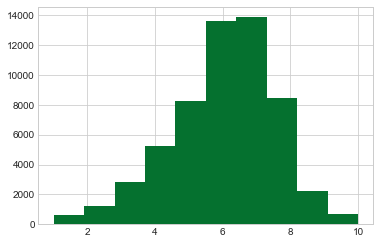

In [68]:
# Histogram of all the ratings in the average_rating column.
plt.hist(games['average_rating'])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
****************************
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                        

(array([  602.,  1231.,  2824.,  5206.,  8223., 13593., 13849.,  8470.,
         2224.,   672.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

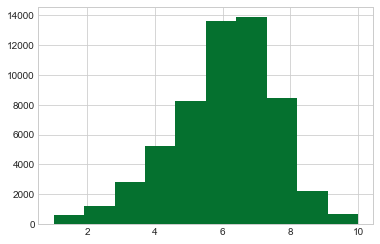

In [112]:
# Printing the first row of all the games with zero scores and scores greater than 0.
print(games[games['average_rating']==0].iloc[0])
print('****************************')
print(games[games['average_rating']>0].iloc[0])

# Removing rows without user reviews.
games=games[games['users_rated']>0]
# Droping rows with missing values.
games=games.dropna(axis=0)

# Histogram of all the ratings in the average_rating column.
plt.hist(games['average_rating'])

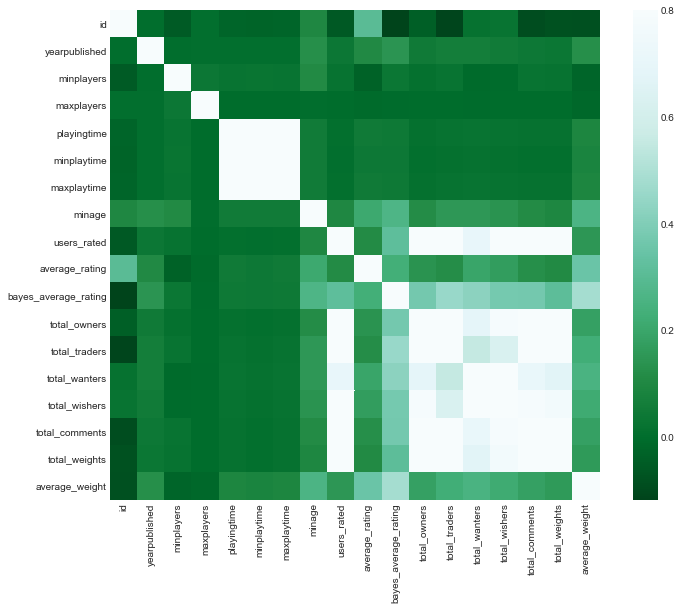

In [101]:
# Correlation Matrix
gameCorr=games.corr()
# Heatmap
fig=plt.figure(figsize=(12,9))
sns.heatmap(gameCorr,vmax=.8,square=True,cmap='BuGn_r')

In [102]:
# Get all the columns from the dataframe.
columns=games.columns.tolist()
# Filter the columns to remove ones we don't want.
columns=[c for c in columns if c not in['bayes_average_rating', 'average_rating', 'type', 'name', 'id']]
# Store the variable we'll be predicting on.
target='average_rating'

### Linear Regression
Here we will deploy a simple linear regression model to predict the average review of each board game.  We will use the mean squared error as a performance metric.  Furthermore, we will compare and contrast these results with the performance of an ensemble method. 

In [114]:
# Importing the convenience function to split the sets.
from sklearn.model_selection import train_test_split
# Generating the training set.
train=games.sample(frac=0.77,random_state=1)
# Select anything not in the training set and put it in the testing set.
test=games.loc[~games.index.isin(train.index)]
# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(43808, 20)
(13086, 20)


In [115]:
# Importing the linear regression model and Mean Squared Error.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initializing the model class.
lr_model=LinearRegression()

# Fitting the model to the training data.
lr_model.fit(train[columns],train[target])

# Generate our predictions for the test set.
predictions=lr_model.predict(test[columns])

# Compute error between our test predictions and the actual values.
print(mean_squared_error(predictions,test[target]))


2.089008256579406


In [116]:
# Importing the random forest model.
from sklearn.ensemble import RandomForestRegressor

# Initialization with some parameters.
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)

# Fitting the model to the data.
model.fit(train[columns], train[target])

# Generating our predictions.
predictions = model.predict(test[columns])

# Compute the error.
mean_squared_error(predictions, test[target])

1.4568197152820233